In [92]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/Video Games Sales.csv')
df.head(10)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,7,8,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,9,10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


In [94]:
df.shape

(1907, 13)

In [95]:
df.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1907.0000,1907.0000,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,953.0000,954.0000,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,550.6478,550.6478,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,0.0000,1.0000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,476.5000,477.5000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,953.0000,954.0000,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,1429.5000,1430.5000,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,1906.0000,1907.0000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


In [96]:
df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [97]:
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
df['Publisher'].replace(np.nan,'No Data Found', inplace = True)
df.isnull().sum()


index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1907 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1907 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [99]:
df.rename(columns={'North America':'NorthAmerica'},inplace=True)
df.rename(columns={'Game Title':'GameTitle'},inplace=True)
df.rename(columns={'Rest of World':'OtherCountries'},inplace=True)
df

,index,Rank,GameTitle,Platform,Year,Genre,Publisher,NorthAmerica,Europe,Japan,OtherCountries,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


[Text(0, 0, '308'),
 Text(0, 0, '275'),
 Text(0, 0, '206'),
 Text(0, 0, '188'),
 Text(0, 0, '186'),
 Text(0, 0, '173'),
 Text(0, 0, '159'),
 Text(0, 0, '126'),
 Text(0, 0, '110'),
 Text(0, 0, '92')]

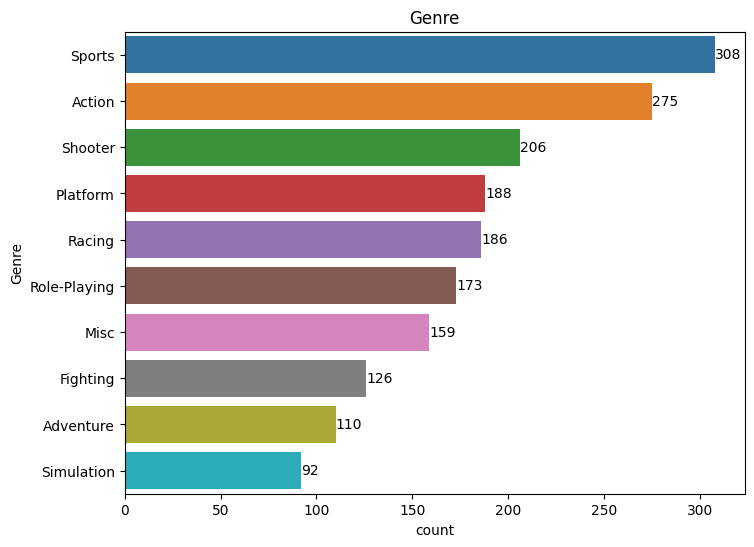

In [100]:
plt.figure(figsize=(8,6))
plt.title("Genre")
cp = sns.countplot(y="Genre", data=df, order= df.Genre.value_counts().iloc[:10].index)
cp.bar_label(cp.containers[0])

The highest sold genre is Sports

[Text(0, 0, '341'),
 Text(0, 0, '296'),
 Text(0, 0, '156'),
 Text(0, 0, '141'),
 Text(0, 0, '93'),
 Text(0, 0, '89'),
 Text(0, 0, '81'),
 Text(0, 0, '75'),
 Text(0, 0, '63'),
 Text(0, 0, '53')]

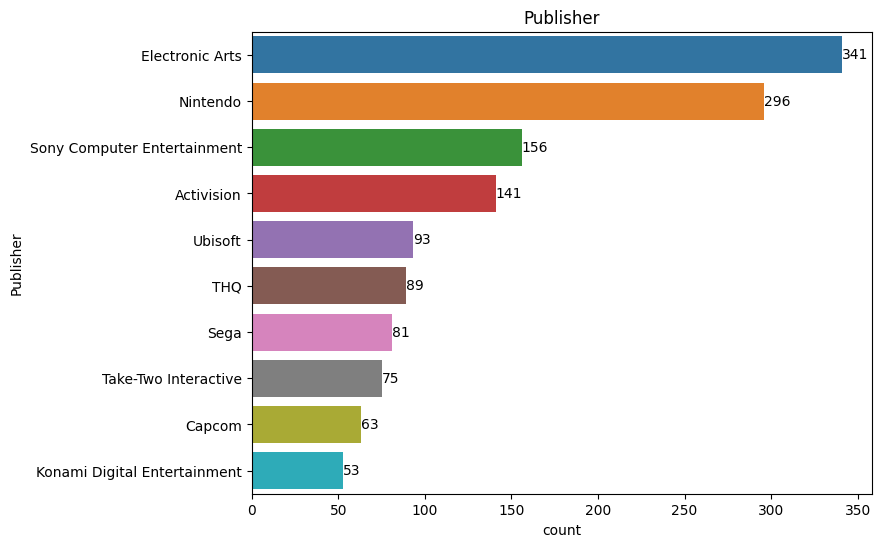

In [101]:
plt.figure(figsize=(8,6))
plt.title("Publisher")
cp = sns.countplot(y="Publisher", data=df, order= df.Publisher.value_counts().iloc[:10].index)
cp.bar_label(cp.containers[0])

The highest sold Publisher is Electronic Arts

[Text(0, 0, '372'),
 Text(0, 0, '223'),
 Text(0, 0, '219'),
 Text(0, 0, '202'),
 Text(0, 0, '161'),
 Text(0, 0, '149'),
 Text(0, 0, '75'),
 Text(0, 0, '72'),
 Text(0, 0, '71'),
 Text(0, 0, '63')]

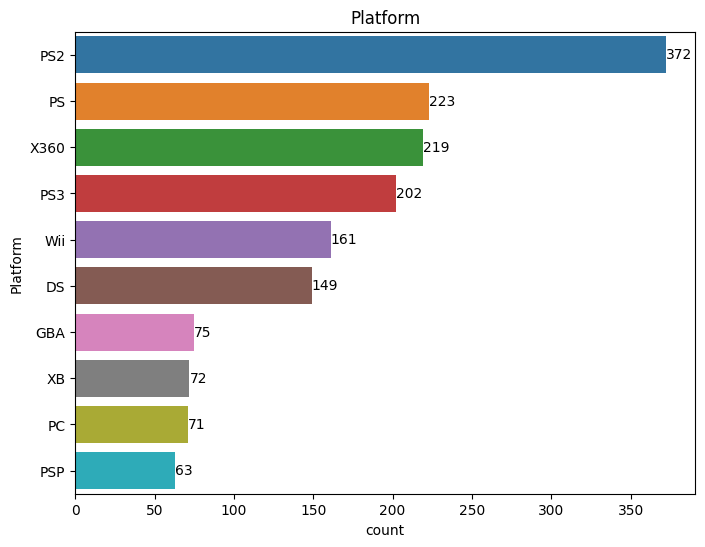

In [102]:
plt.figure(figsize=(8,6))
plt.title("Platform")
cp = sns.countplot(y="Platform", data=df, order= df.Platform.value_counts().iloc[:10].index)
cp.bar_label(cp.containers[0])

Highest Sales in The Platform PS2

In [103]:
unique_categories = df['GameTitle'].unique()
print(unique_categories)

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Lizzie McGuire 2: Lizzie Diaries' 'Xenoblade Chronicles'
 'FIFA Soccer World Championship']


In [104]:
df.GameTitle.value_counts()

LEGO Batman: The Videogame                     6
FIFA Soccer 08                                 6
LEGO Indiana Jones: The Original Adventures    6
WWE SmackDown vs Raw 2008                      5
Pro Evolution Soccer 2008                      5
                                              ..
Star Wars: Dark Forces                         1
The 7th Guest                                  1
Crash Nitro Kart                               1
Scribblenauts                                  1
FIFA Soccer World Championship                 1
Name: GameTitle, Length: 1519, dtype: int64

#Global Sales Per Platform

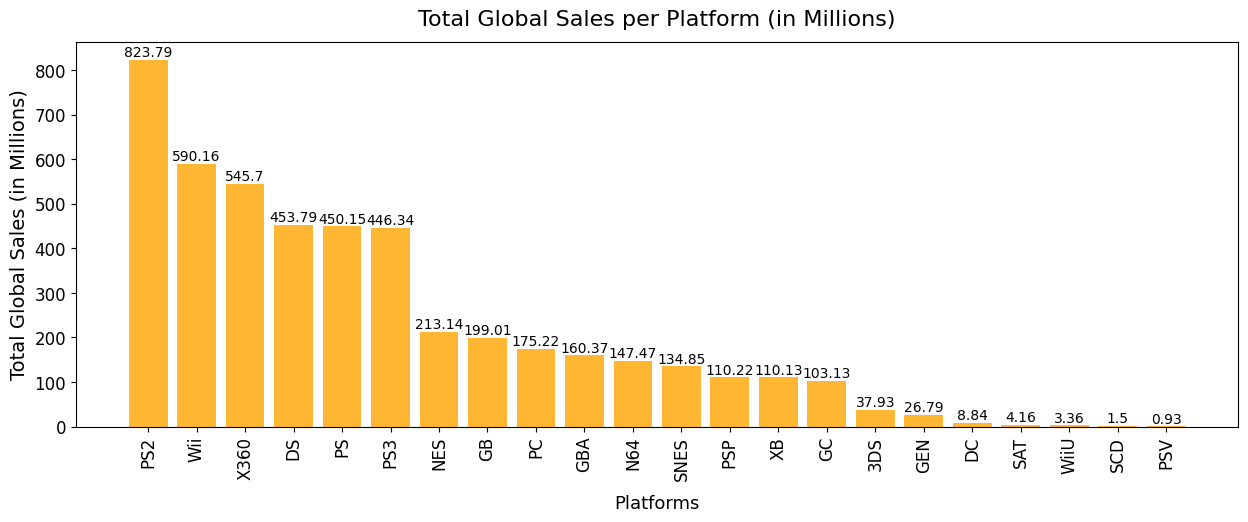

In [105]:
fig, ax = plt.subplots(figsize=(15, 5))

# Compute for total vg global sales for each platform
platform_global_sales = df.groupby('Platform')['Global']
platform_global_sales = platform_global_sales.sum().sort_values(ascending=False)
ax.bar(platform_global_sales.index, platform_global_sales.values, color='orange', alpha=0.8)
ax.set_title('Total Global Sales per Platform (in Millions)', fontsize=16, y=1.02)
ax.set_xlabel('Platforms', fontsize=13, labelpad=10)
ax.set_ylabel('Total Global Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.bar_label(ax.containers[0])
fig.subplots_adjust(hspace=0.30)

#NA Sales Per Platform

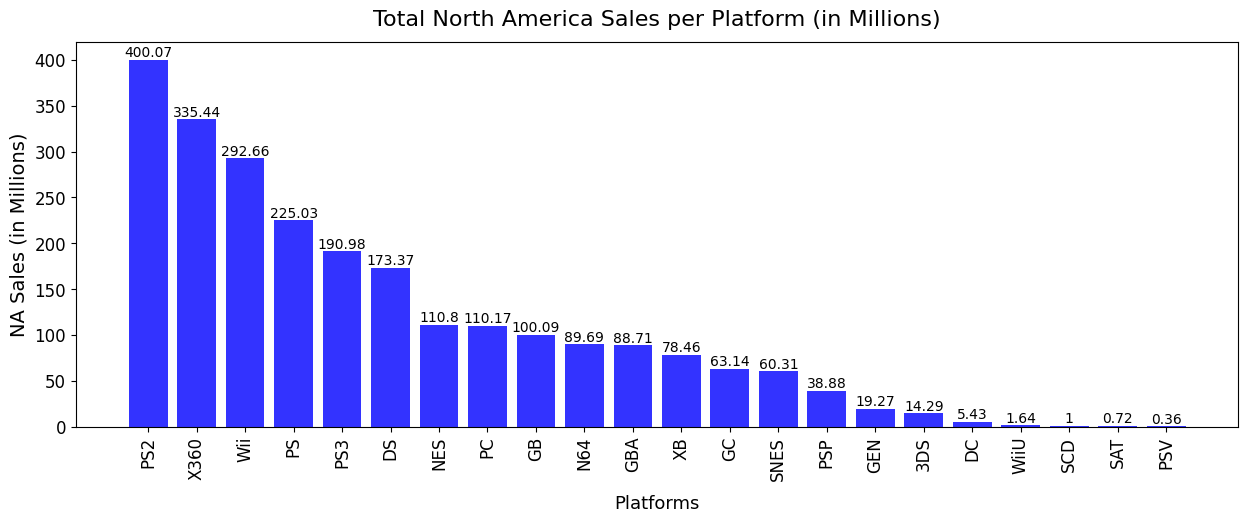

In [110]:
fig, ax = plt.subplots(figsize=(15, 5))

platform_na_sales = df.groupby('Platform')['NorthAmerica']
platform_na_sales = platform_na_sales.sum().sort_values(ascending=False)
ax.bar(platform_na_sales.index, platform_na_sales.values, color='blue', alpha=0.8)
ax.set_title('Total North America Sales per Platform (in Millions)', fontsize=16, y=1.02)
ax.set_xlabel('Platforms', fontsize=13, labelpad=10)
ax.set_ylabel('NA Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.bar_label(ax.containers[0])
fig.subplots_adjust(hspace=0.30)

#Europe Sales per Platform

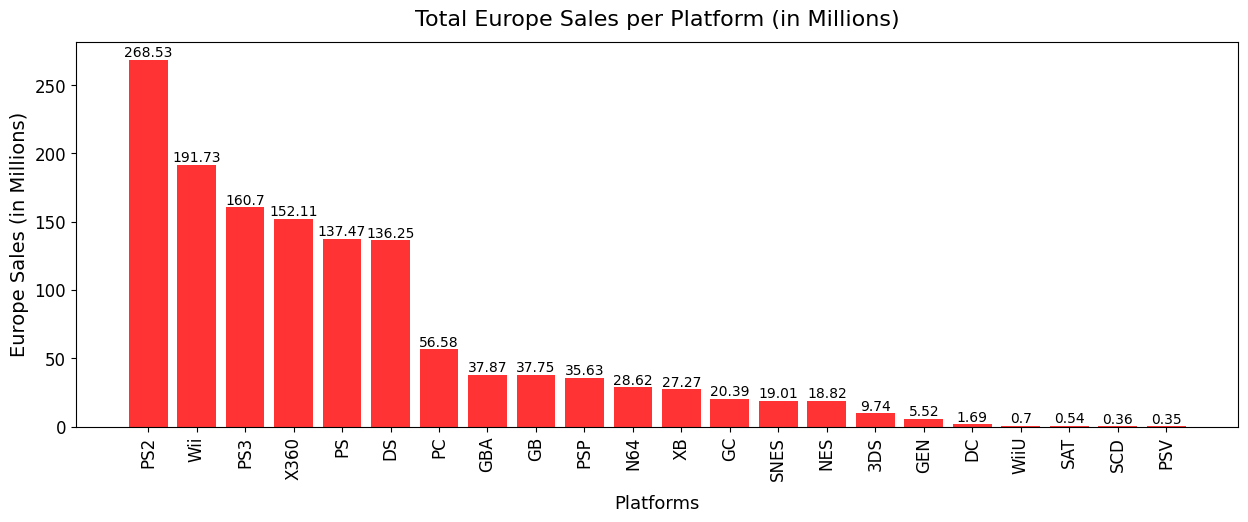

In [111]:
fig, ax = plt.subplots(figsize=(15, 5))


platform_eu_sales = df.groupby('Platform')['Europe']
platform_eu_sales = platform_eu_sales.sum().sort_values(ascending=False)
ax.bar(platform_eu_sales.index, platform_eu_sales.values, color='red', alpha=0.8)
ax.set_title('Total Europe Sales per Platform (in Millions)', fontsize=16, y=1.02)
ax.set_xlabel('Platforms', fontsize=13, labelpad=10)
ax.set_ylabel('Europe Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.bar_label(ax.containers[0])
fig.subplots_adjust(hspace=0.30)

#Japan Sales per Platform

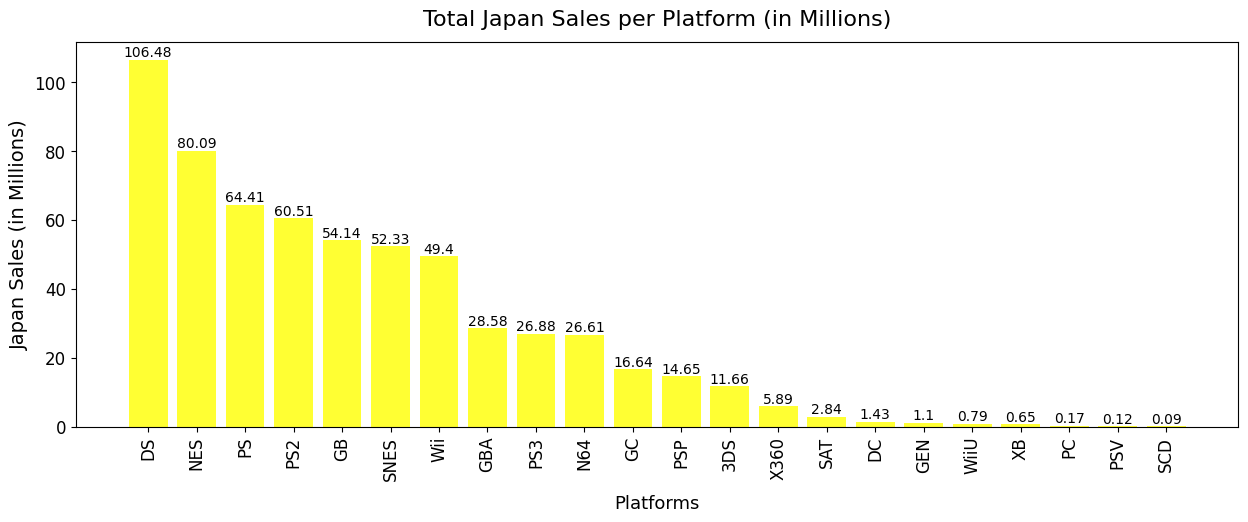

In [114]:
fig, ax = plt.subplots(figsize=(15, 5))


platform_jp_sales = df.groupby('Platform')['Japan']
platform_jp_sales = platform_jp_sales.sum().sort_values(ascending=False)
ax.bar(platform_jp_sales.index, platform_jp_sales.values, color='yellow', alpha=0.8)
ax.set_title('Total Japan Sales per Platform (in Millions)', fontsize=16, y=1.02)
ax.set_xlabel('Platforms', fontsize=13, labelpad=10)
ax.set_ylabel('Japan Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.bar_label(ax.containers[0])
fig.subplots_adjust(hspace=0.30)

#Other Countries Sales per Platform

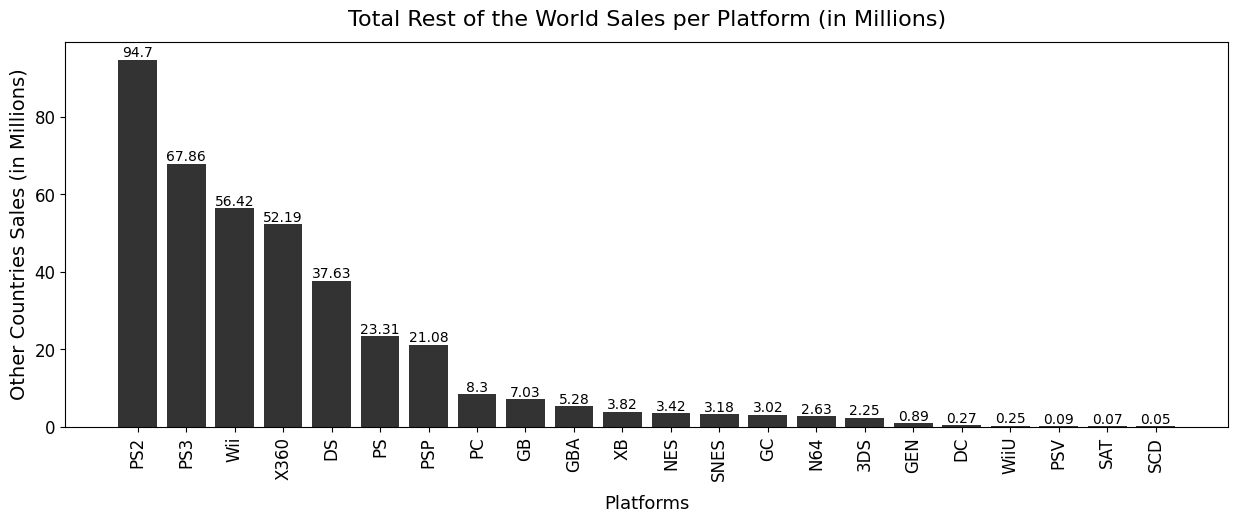

In [115]:
fig, ax = plt.subplots(figsize=(15, 5))


platform_ra_sales = df.groupby('Platform')['OtherCountries']
platform_ra_sales = platform_ra_sales.sum().sort_values(ascending=False)
ax.bar(platform_ra_sales.index, platform_ra_sales.values, color='black', alpha=0.8)
ax.set_title('Total Rest of the World Sales per Platform (in Millions)', fontsize=16, y=1.02)
ax.set_xlabel('Platforms', fontsize=13, labelpad=10)
ax.set_ylabel('Other Countries Sales (in Millions)', fontsize=14)
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.bar_label(ax.containers[0])
fig.subplots_adjust(hspace=0.30)

#Number of Games Released - Year by Year

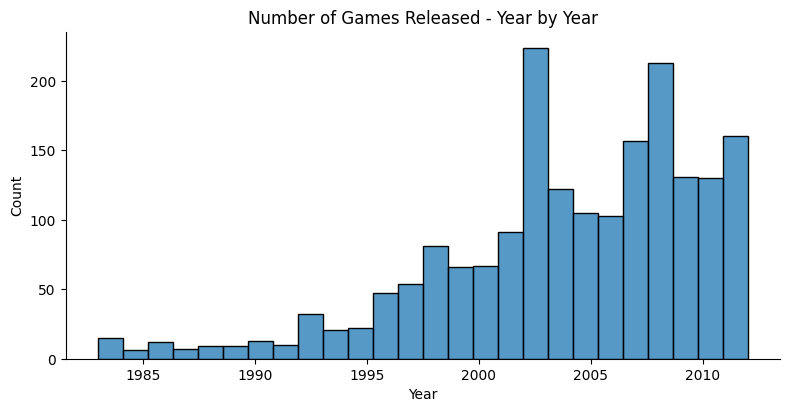

In [117]:
df['Year'] = df['Year'].astype(int)
dt = sns.displot(data = df ,x="Year", height=4,aspect=2)
dt.set(title='Number of Games Released - Year by Year')

# Video Game Genres Based on Sales per Country

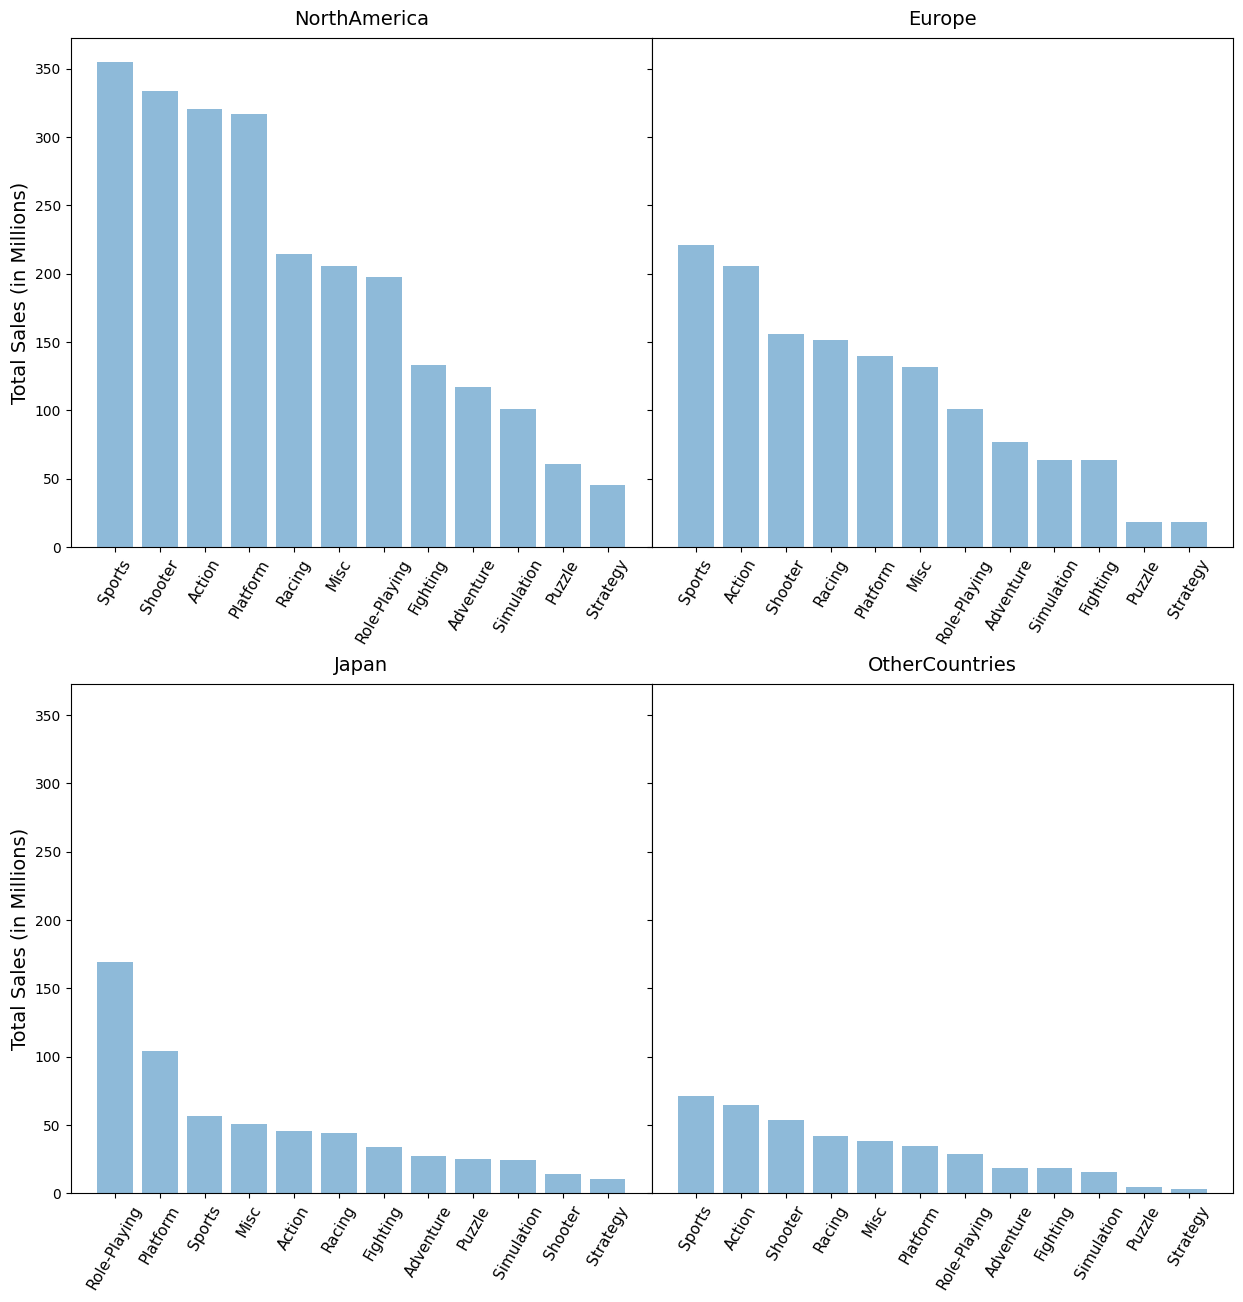

In [126]:
grouped = df.groupby('Genre')[['NorthAmerica', 'Europe',
                                     'Japan', 'OtherCountries']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
for i in range(2):
    for j in range(2):
        idx = i*2+j
        rec = res.iloc[idx, :].sort_values(ascending=False)
        axes[i, j].bar(rec.index, rec.values, alpha=0.5)
        axes[i, j].set_title(rec.name, fontsize=14, y=1.01)
        if idx % 2 == 0:
            axes[i, j].set_ylabel('Total Sales (in Millions)', fontsize=14)
        axes[i, j].tick_params(axis='x', labelsize=11, rotation=60)

fig.subplots_adjust(wspace=0, hspace=0.27)

#Conclusion
*   Most Sold Genre is Sports
*   Most Sold Publisher is Electronic Arts
*   Many games were sold in the Platform PS2
*   Most of the Games were released in the year 2003.
*   It can be noted that, in Japan, Platform PS2 is in the 4rth Place, whereas in other countries it is in the 1st Position. PS2 has less customers in Japan.
*   Platform DS holds the First Position in Japan, followed by NES and PS.
*   The most popular genre in all other countries is Sports, whereas in Japan it is Role-Playing.